In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

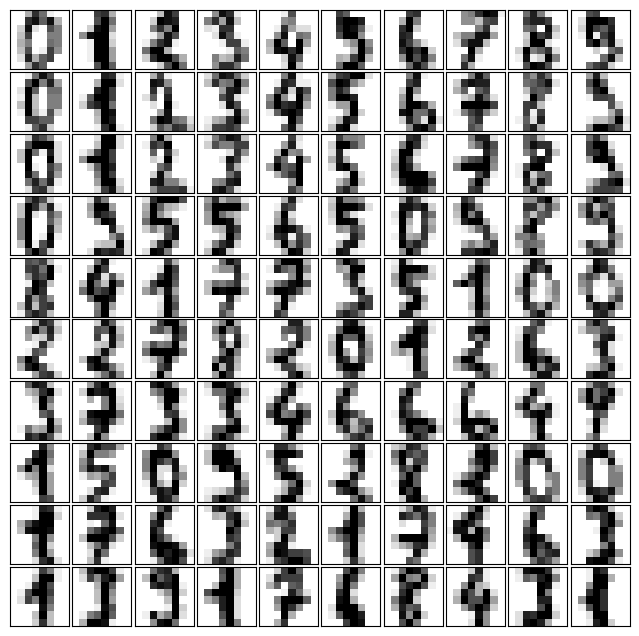

In [3]:
# plotting the first 100 digits

def plot_digits(data):
    fig, ax = plt.subplots(10, 10, figsize=(8, 8), subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(hspace=0.05, wspace=0.05)
    for i, axi in enumerate(ax.flat):
        im = axi.imshow(data[i].reshape(8, 8), cmap='binary')
        im.set_clim(0, 16)
plot_digits(digits.data)

In [4]:
from sklearn.decomposition import PCA
pca = PCA(0.99, whiten=True) # preserving 99% variance
data = pca.fit_transform(digits.data)
data.shape

(1797, 41)

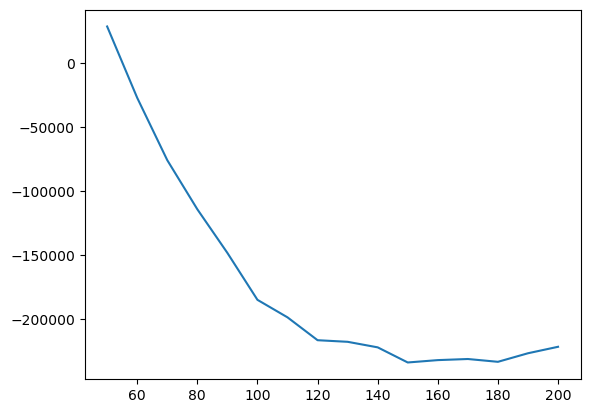

In [5]:
from sklearn.mixture import GaussianMixture as GMM

n_components = np.arange(50, 210, 10)
models = [GMM(n, covariance_type='full', random_state=0) for n in n_components]
aics = [model.fit(data).aic(data) for model in models]
plt.plot(n_components, aics);

In [6]:
# 150 components minimises the aic 
gmm = GMM(150, covariance_type='full', random_state=0)
gmm.fit(data)
print(gmm.converged_)

True


In [17]:
# since the lower dimensional model has converged, we can draw new samples
data_new = gmm.sample(100)
data_new[0].shape

(100, 41)

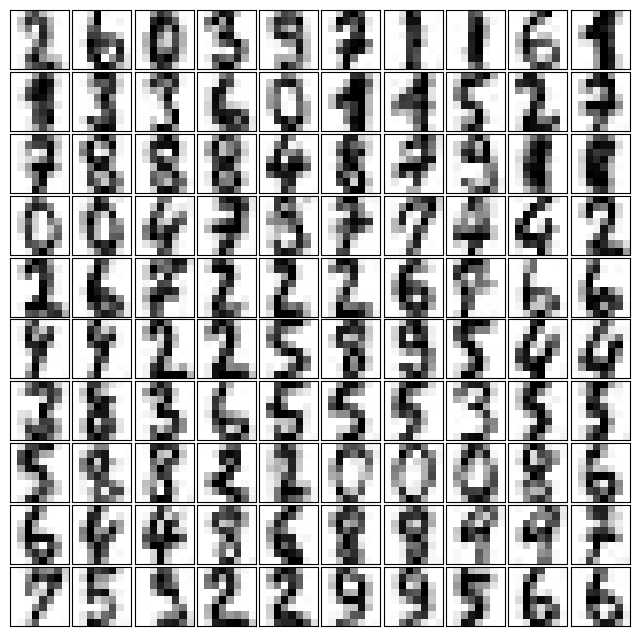

In [21]:
# using inverse transform of PCA to construct the new digits

digits_new = pca.inverse_transform(data_new[0])
plot_digits(digits_new)